# 13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb

In [2]:
# def confution matrix

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False
                      )
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    

In [3]:
boston = sm.datasets.get_rdataset('Boston', 'MASS')

In [4]:
print(boston.__doc__)

====== ===============
Boston R Documentation
====== ===============

Housing Values in Suburbs of Boston
-----------------------------------

Description
~~~~~~~~~~~

The ``Boston`` data frame has 506 rows and 14 columns.

Usage
~~~~~

::

   Boston

Format
~~~~~~

This data frame contains the following columns:

``crim``
   per capita crime rate by town.

``zn``
   proportion of residential land zoned for lots over 25,000 sq.ft.

``indus``
   proportion of non-retail business acres per town.

``chas``
   Charles River dummy variable (= 1 if tract bounds river; 0
   otherwise).

``nox``
   nitrogen oxides concentration (parts per 10 million).

``rm``
   average number of rooms per dwelling.

``age``
   proportion of owner-occupied units built prior to 1940.

``dis``
   weighted mean of distances to five Boston employment centres.

``rad``
   index of accessibility to radial highways.

``tax``
   full-value property-tax rate per \\$10,000.

``ptratio``
   pupil-teacher ratio by town.



In [5]:
dboston = boston.data
dboston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
dboston['crim'].median()

0.25651

In [7]:
crim01 = (dboston['crim'] > dboston['crim'].median()).astype('int')
crim01

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: crim, Length: 506, dtype: int32

In [8]:
crim01.value_counts()

1    253
0    253
Name: crim, dtype: int64

In [10]:
dboston_fixed = dboston.drop('crim', axis=1)
dboston_fixed['crim01'] = crim01
dboston_fixed

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


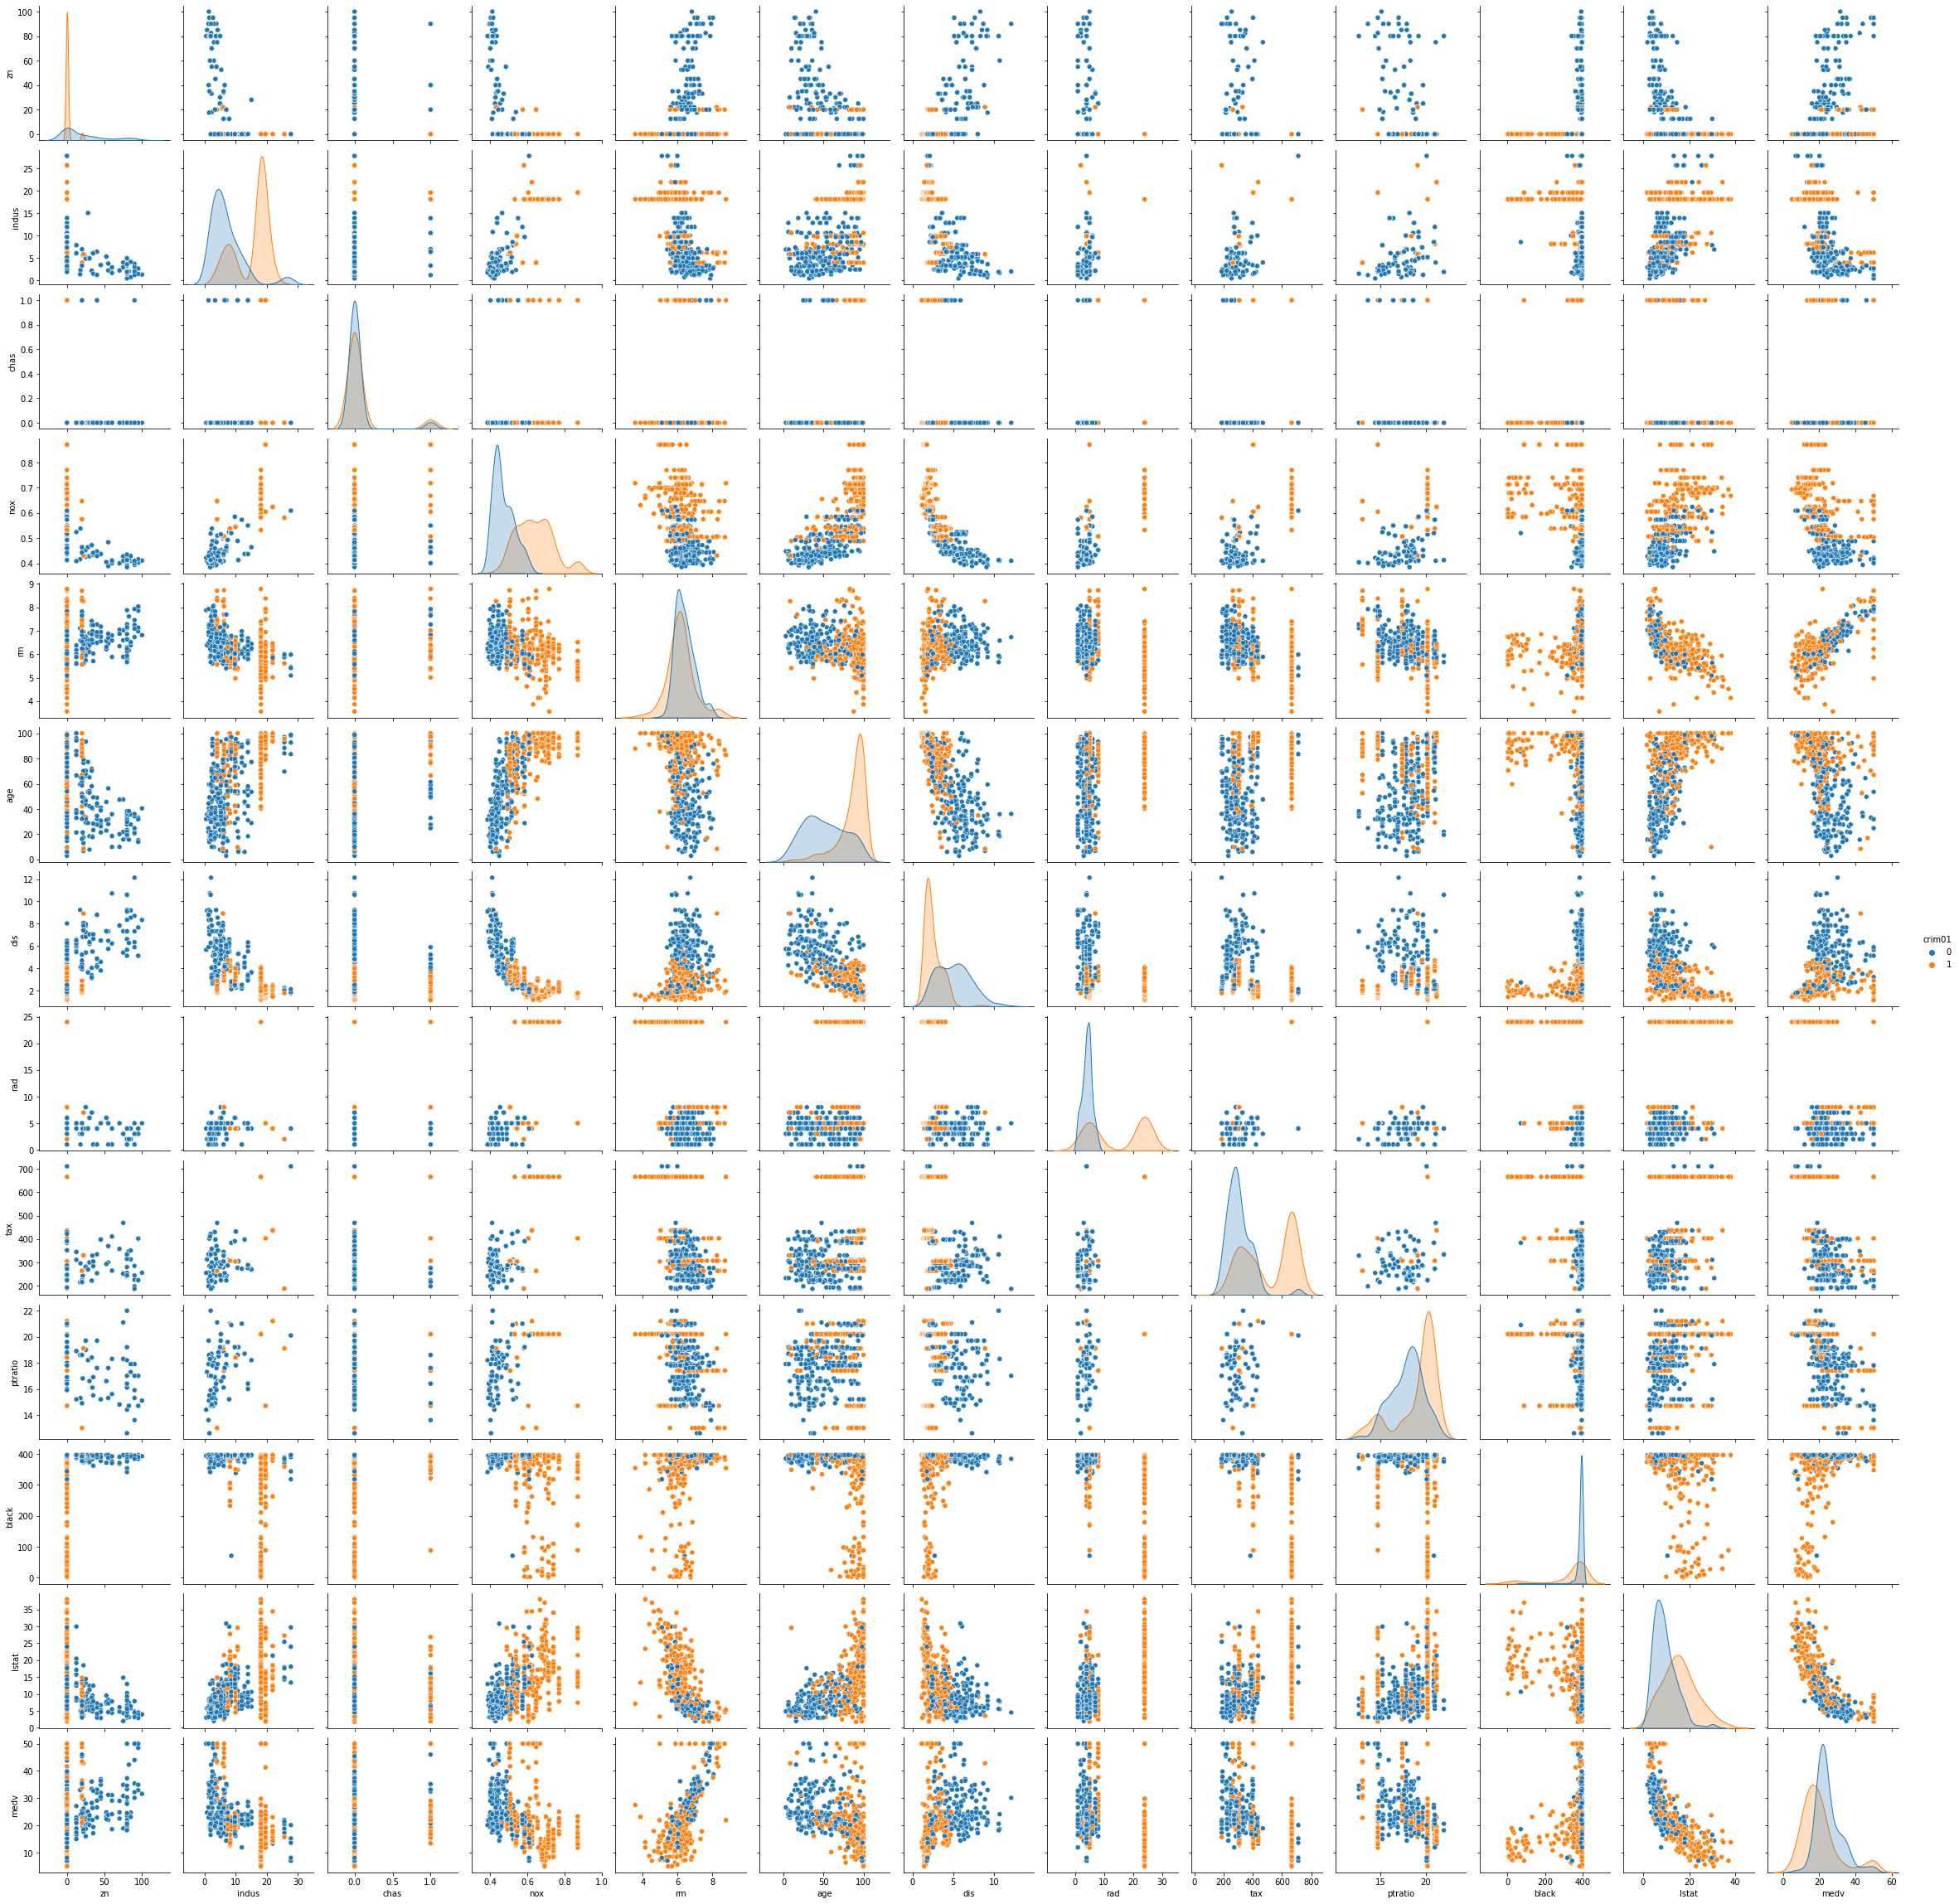

In [9]:
import seaborn as sns

sns.pairplot(dboston_fixed, hue = "crim01");

In [161]:
from sklearn.model_selection import train_test_split

np.random.seed(7)

X = dboston_fixed.drop(['crim01'], axis=1)
y = dboston_fixed['crim01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [1]:
X_train1 = sm.add_constant(X_train)
y_train1 = y_train

clf_lr = sm.Logit(y_train1, X_train1).fit()
print(clf_lr.summary())

NameError: name 'sm' is not defined

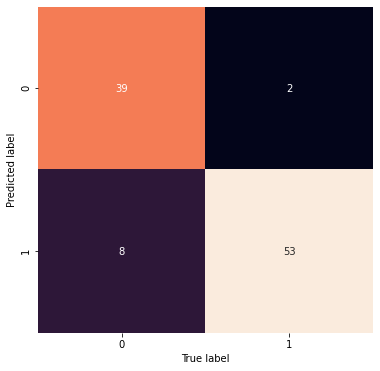

In [72]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)
                           
import seaborn as sns

yhat = clf_lr.predict(sm.add_constant(X_test))

prediction = list(map(round, yhat)) 

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  

plot_conf_mat(cm)

In [73]:
accuracy_score(y_test, prediction)

0.9019607843137255

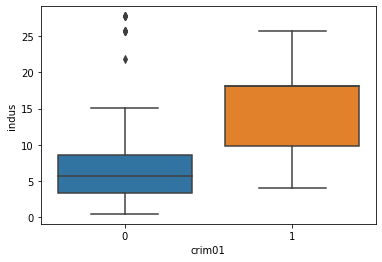

In [33]:
ax = sns.boxplot(x="crim01", y="indus", data=dboston_fixed)

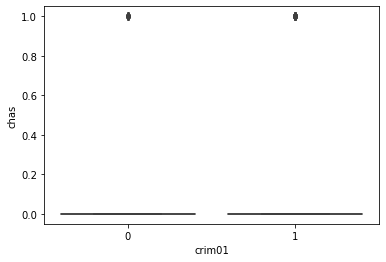

In [34]:
ax = sns.boxplot(x="crim01", y="chas", data=dboston_fixed)

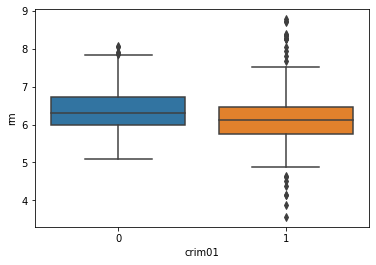

In [35]:
ax = sns.boxplot(x="crim01", y="rm", data=dboston_fixed)

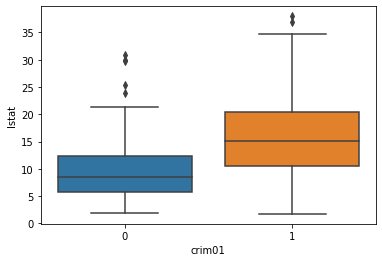

In [37]:
ax = sns.boxplot(x="crim01", y="lstat", data=dboston_fixed)

### Logistic Regression Model without 'rm'

In [74]:
X_train11 = sm.add_constant(X_train.drop('rm', axis=1))
y_train11 = y_train

clf_lr1 = sm.Logit(y_train11, X_train11).fit()
print(clf_lr1.summary())

Optimization terminated successfully.
         Current function value: 0.200531
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                           12
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.7102
Time:                        20:47:31   Log-Likelihood:                -81.014
converged:                       True   LL-Null:                       -279.54
Covariance Type:            nonrobust   LLR p-value:                 1.599e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.7039      7.435     -5.206      0.000     -53.276     -24.132
zn            -0.0925      0

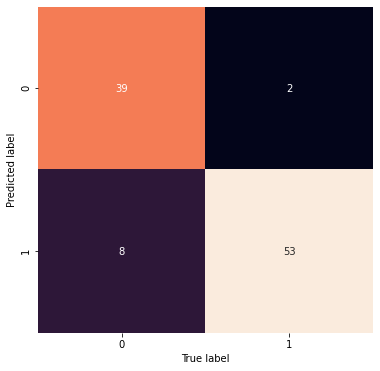

In [94]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)
                           
import seaborn as sns

yhat1 = clf_lr1.predict(sm.add_constant(X_test.drop('rm',axis=1)))

prediction1 = list(map(round, yhat1)) 

# confusion matrix 
cm1 = confusion_matrix(y_test, prediction1)  

plot_conf_mat(cm1)

In [79]:
accuracy_score(y_test, prediction1)

0.9019607843137255

### Logistic Regression Model without 'rm', 'lstat'

In [80]:
X_train12 = sm.add_constant(X_train.drop(['rm','lstat'], axis=1))
y_train12 = y_train

clf_lr2 = sm.Logit(y_train12, X_train12).fit()
print(clf_lr2.summary())

Optimization terminated successfully.
         Current function value: 0.203219
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                           11
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.7063
Time:                        20:48:29   Log-Likelihood:                -82.100
converged:                       True   LL-Null:                       -279.54
Covariance Type:            nonrobust   LLR p-value:                 7.503e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.3766      7.232     -5.030      0.000     -50.551     -22.202
zn            -0.0811      0

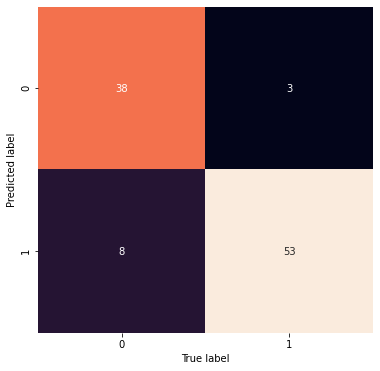

In [96]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)
                           
import seaborn as sns

yhat2 = clf_lr2.predict(sm.add_constant(X_test.drop(['rm', 'lstat'],axis=1)))

prediction2 = list(map(round, yhat2)) 

# confusion matrix 
cm2 = confusion_matrix(y_test, prediction2)  

plot_conf_mat(cm2)

In [97]:
accuracy_score(y_test, prediction2)

0.8921568627450981

### Logistic Regression Model without 'lstat'

In [83]:
X_train13 = sm.add_constant(X_train.drop(['lstat'], axis=1))
y_train13 = y_train

clf_lr3 = sm.Logit(y_train13, X_train13).fit()
print(clf_lr3.summary())

Optimization terminated successfully.
         Current function value: 0.200978
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                           12
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.7095
Time:                        20:48:46   Log-Likelihood:                -81.195
converged:                       True   LL-Null:                       -279.54
Covariance Type:            nonrobust   LLR p-value:                 1.907e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.7320      7.255     -4.925      0.000     -49.951     -21.513
zn            -0.0814      0

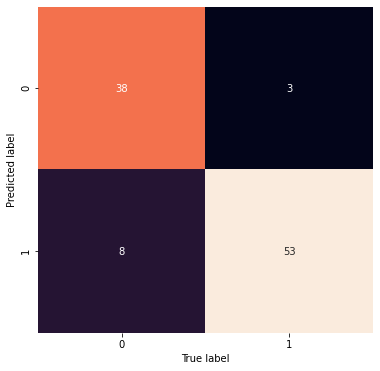

In [98]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)
                           
import seaborn as sns

yhat3 = clf_lr3.predict(sm.add_constant(X_test.drop(['lstat'],axis=1)))

prediction3 = list(map(round, yhat3)) 

# confusion matrix 
cm3 = confusion_matrix(y_test, prediction3)  

plot_conf_mat(cm3)

In [100]:
accuracy_score(y_test, prediction3)

0.8921568627450981

### Logistic Regression Model without 'indus'

In [86]:
X_train14 = sm.add_constant(X_train.drop(['indus'], axis=1))
y_train14 = y_train

clf_lr4 = sm.Logit(y_train14, X_train14).fit()
print(clf_lr4.summary())

Optimization terminated successfully.
         Current function value: 0.200767
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                           12
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.7098
Time:                        20:49:08   Log-Likelihood:                -81.110
converged:                       True   LL-Null:                       -279.54
Covariance Type:            nonrobust   LLR p-value:                 1.756e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.8567      7.435     -4.957      0.000     -51.429     -22.285
zn            -0.0906      0

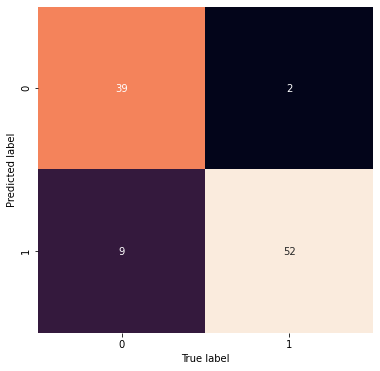

In [102]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)
                           
import seaborn as sns

yhat4 = clf_lr4.predict(sm.add_constant(X_test.drop(['indus'],axis=1)))

prediction4 = list(map(round, yhat4)) 

# confusion matrix 
cm4 = confusion_matrix(y_test, prediction4)  

plot_conf_mat(cm4)

In [103]:
accuracy_score(y_test, prediction4)

0.8921568627450981

### Logistic Regression Model without 'chas'

In [89]:
X_train15 = sm.add_constant(X_train.drop(['chas'], axis=1))
y_train15 = y_train

clf_lr5 = sm.Logit(y_train15, X_train15).fit()
print(clf_lr5.summary())

Optimization terminated successfully.
         Current function value: 0.201025
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                           12
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.7095
Time:                        20:49:27   Log-Likelihood:                -81.214
converged:                       True   LL-Null:                       -279.54
Covariance Type:            nonrobust   LLR p-value:                 1.943e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.7721      7.390     -4.976      0.000     -51.256     -22.288
zn            -0.0993      0

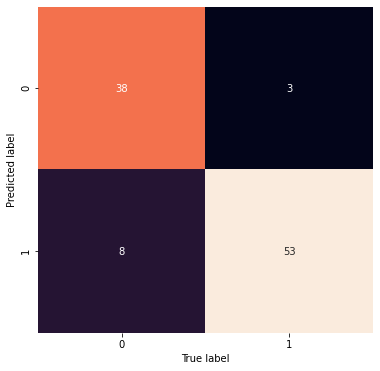

In [90]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)
                           
import seaborn as sns

yhat5 = clf_lr5.predict(sm.add_constant(X_test.drop(['chas'],axis=1)))

prediction5 = list(map(round, yhat5)) 

# confusion matrix 
cm5 = confusion_matrix(y_test, prediction5)  

plot_conf_mat(cm5)

In [104]:
accuracy_score(y_test, prediction5)

0.8921568627450981

## LDA

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)

clf_lda.score(X_test, y_test)

0.803921568627451

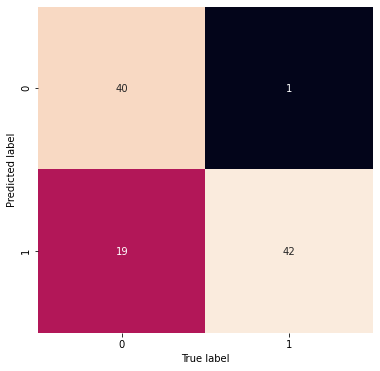

In [106]:
from sklearn.metrics import confusion_matrix
                           
import seaborn as sns

prediction = clf_lda.predict(X_test)

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  

plot_conf_mat(cm)

### Quadratic

In [108]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train, y_train);

clf_qda.score(X_test, y_test)

0.8823529411764706

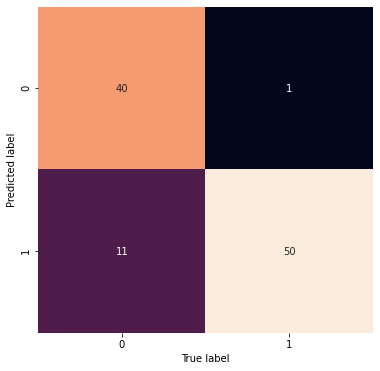

In [110]:
prediction = clf_qda.predict(X_test)

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  

plot_conf_mat(cm)

### KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 50)
clf_knn.fit(X_train, y_train)

clf_knn.score(X_test, y_test)

0.8725490196078431

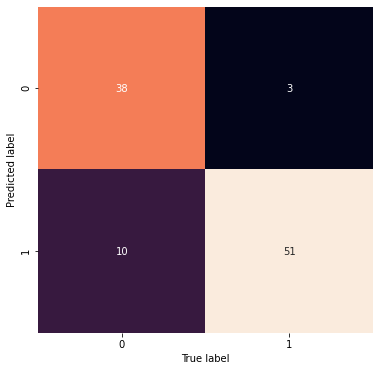

In [116]:
prediction = clf_knn.predict(X_test)

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
 

plot_conf_mat(cm)

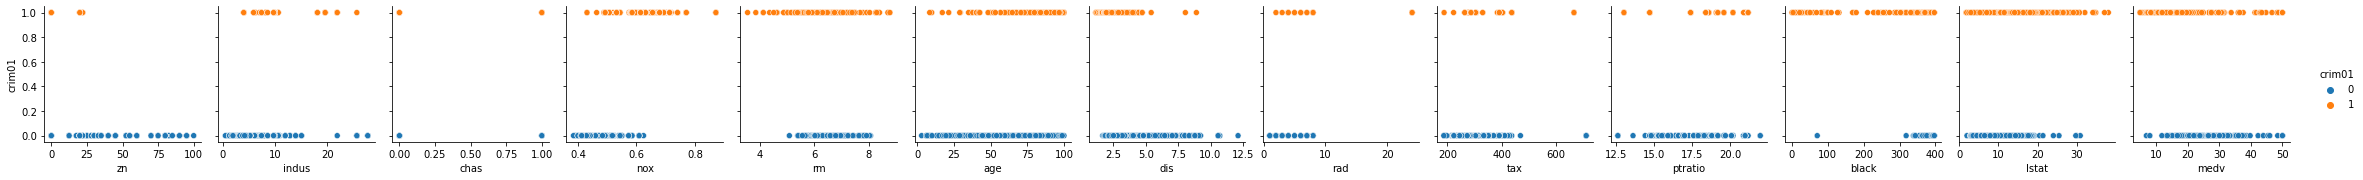

In [124]:
myVars =  list(dboston_fixed.drop('crim01', axis=1).columns) 
sns.pairplot(dboston_fixed, hue='crim01', y_vars='crim01', x_vars=myVars)

<AxesSubplot:xlabel='Predictors', ylabel='Outcome'>

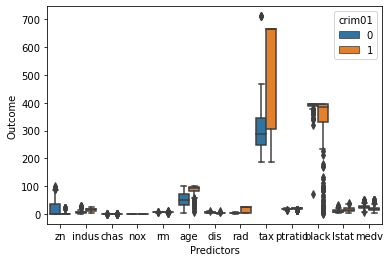

In [139]:
df_meltBoston = pd.melt(dboston_fixed, "crim01", var_name="Predictors", value_name="Outcome")

sns.boxplot(x="Predictors", hue="crim01", y="Outcome", data=df_meltBoston)


In [149]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

scaled_data = minmax_scale(dboston_fixed)
scaled_data = pd.DataFrame(scaled_data, columns=dboston_fixed.columns)

<AxesSubplot:xlabel='Predictors', ylabel='Outcome'>

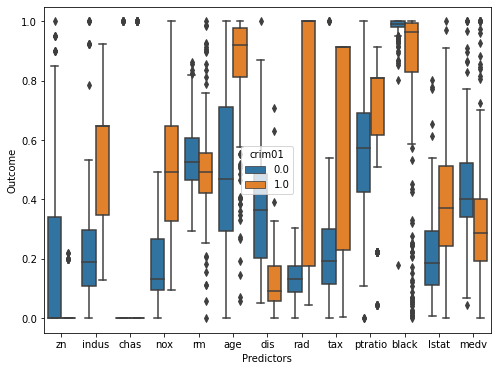

In [159]:
df_meltBoston = pd.melt(scaled_data, "crim01", var_name="Predictors", value_name="Outcome")

fig, ax = plt.subplots(figsize = (8, 6))

sns.boxplot(x="Predictors", hue="crim01", y="Outcome", data=df_meltBoston, ax=ax)

In [150]:
scaled_data

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.0
1,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.0
2,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.0
3,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.0
4,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667,0.0
502,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667,0.0
503,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000,0.0
504,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778,0.0


In [163]:
from sklearn.model_selection import train_test_split

np.random.seed(7)

X2 = scaled_data.drop(['crim01'], axis=1)
y2 = scaled_data['crim01']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2)

In [164]:
X_train2 = sm.add_constant(X_train2)
y_train2 = y_train2

clf_lr21 = sm.Logit(y_train2, X_train2).fit()
print(clf_lr21.summary())

Optimization terminated successfully.
         Current function value: 0.199514
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                           13
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.7117
Time:                        21:48:18   Log-Likelihood:                -80.604
converged:                       True   LL-Null:                       -279.54
Covariance Type:            nonrobust   LLR p-value:                 6.317e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0382      4.075     -3.199      0.001     -21.026      -5.051
zn            -9.0424      4